## Decision Trees

```{figure} /images/classification/GOT_DT.png
---
height: 500px
name: GOT decision tree 
align: center
---
A decision tree Game of Thrones personality test.
```
Decision trees are a fundamental method in machine learning due to their inherently interpretable structure. They model decisions in a tree-like structure, where each internal node splits the outcomes based on a feature value, until we arrive at a leaf node that assigns a class prediction. This structure is so intuitive, that no further information is needed to perform the inference step. As an example, have a look at the Game of Thrones personality test decision tree above. You probably already got your character prediction without having to know what a decision tree is. This is particularly useful when you work in application domains where your project partners have no deepened mathematical training, for example in the medical domain. You can show a decision tree to experts of their field and they will be able to assess whether the predictions are sensible. Of course, this advantage gets lost if the decision tree is very big. 

One of the most widely used algorithms for constructing decision trees is the CART (Classification and Regression Trees) algorithm, which builds binary decision trees using impurity measures such as Gini impurity (for classification).


### Inference

```{prf:definition} Decision Tree
A Decision Tree is a directed binary tree that represents a classifying function $f_{dt}:\mathbb{R}^d\rightarrow [0,1]^c$. The classifying function is defined recursively:
$$f_{dt}(\vvec{x})=q(\vvec{x})f_0(\vvec{x}) + (1-q(\vvec{x}))f_1(\vvec{x})$$
where 
* the **decision function** $q:\mathbb{R}^d\rightarrow \{0,1\}$ performs a test on a feature of the input $\vvec{x}$ that is either true (returning 1) or false (returning 0). 
* the function $f_b:\mathbb{R}^d\rightarrow [0,1]^c$ returns either directly a probability vector over all classes, or it is recursively defined as
$$f_b(\vvec{x}) = q_b(\vvec{x}){f_b}_0(\vvec{x}) + (1-q_b(\vvec{x})){f_b}_1(\vvec{x}).$$

In the tree, these functions are represented by
* **Decision nodes:** each decision function $q_b$ is represented by an internal node, performing a split based on feature values.
* **Prediction nodes:** each function $f_b(\vvec{x})=\vvec{p}$ that directly returns a probability vector over all classes, (that is hence not defined over further recursions) is represented by a leaf node.
```
Although decision trees are often represented as if they only store the predicted label at a leaf, in practice, the class probabilities are stored. Class probabilities are useful as a confidence measure of the prediction $ \hat{y} = \argmax_y\ f_{dt}(\vvec{x}) $.

```{prf:example}
The data underlying the GOT personality test dataset could for example have the features $\mathtt{x}_1,\ldots,\mathtt{x}_4$, where
* $\mathtt{x}_1$ represents the glasses of wine per day (contiuous feature)
* $\mathtt{x}_2$ represents the ability to get others to do their work (binary feature)
* $\mathtt{x}_3$ represents the characteristic to burn everything down if issues persist (binary feature)
* $\mathtt{x}_4$ represents the reliance on lists to organize big projects (binary feature).      

The root node (a decision node) of our GOT personality test could then be expressed by the split function
$$q(\vvec{x})=\begin{cases}1 & \text{if }x_1\geq 5\\0 & \text{otherwise}\end{cases}$$
We build the decision tree classifier now recursively. We have
$$f_{dt}(\vvec{x})=q(\vvec{x})f_0(\vvec{x}) + (1-q(\vvec{x}))f_1(\vvec{x}).$$
The function $f_0$ represents the left subtree and the function $f_1$ the right subtree. The left subtree is defined as
$$f_0(\vvec{x})=q_0(\vvec{x}){f_0}_0(\vvec{x})+(1-q_0(\vvec{x})){f_0}_1(\vvec{x}),$$
where 
$$q_0(\vvec{x})=\begin{cases}1 & \text{if }x_2=1\\0 & \text{otherwise}\end{cases}$$
and ${f_0}_0(\vvec{x})$ and ${f_0}_1(\vvec{x})$ are returning a probability vector over the five classes, where the highest probability of ${f_0}_0(\vvec{x})$ is assigned for class `Cersei` and the highest probability of ${f_0}_1(\vvec{x})$ is assigned for class `Tyrion`.

The right subtree is defined as
$$f_1(\vvec{x})=q_1(\vvec{x}){f_1}_0(\vvec{x})+(1-q_1(\vvec{x})){f_0}_1(\vvec{x}),$$
where
$$q_1(\vvec{x})=\begin{cases}1 & \text{if }x_3=1\\0 & \text{ otherwise}\end{cases}.$$
${f_1}_0(\vvec{x})$ is represented by a prediction node and returns a probability vector where the highest probability is assigned to `Daenerys`. The function ${f_0}_1$ returns a subtree that is defined as
$${f_0}_1(\vvec{x})={q_0}_1(\vvec{x}){{f_0}_1}_0(\vvec{x})+(1-{q_0}_1(\vvec{x})){{f_0}_1}_1(\vvec{x}),$$
where 
$${q_0}_1(\vvec{x})=\begin{cases}1 & \text{if }x_4=1\\0 & \text{ otherwise}\end{cases}$$
and ${{f_0}_1}_0(\vvec{x})$ returns a probability vector with the highest probability assigned to `Arya` and ${{f_0}_1}_1(\vvec{x})$ assigns the highest probability to `John Snow`.
```
### Training
We provide the pseudocode for the recursive creation of the Classification and Regression Tree (CART) algorithm {cite}`breiman1984classification` in {prf:ref}`dt_training`. The input of CART is here specified to be the dataset $\mathcal{D}$ only, but in principle CART has various hyperparameters that are here summarized by the hard-coded stopping criterion. We discuss possible stopping criteria in a subsection below. If the stopping criterium is satisfied, then the CART algorithm returns a probability vector that reflects the empirical class-distribution in the dataset $\mathcal{D}$ 
\begin{align*}
p_{\cal D} (y) = \frac{\lvert\{({\bf x}, l) \in {\cal D}\mid  l = y \}\rvert}{\lvert{\cal D}\rvert}. 
\end{align*}
Otherwise, a split is found (to be discussed below), returning the decision function $q$ and the split datasets $\mathcal{L}_0\cup \mathcal{L}_1 = \mathcal{D}$. CART proceeds then with the recursion.


```{prf:algorithm} Classification and Regression Tree (CART)
:label: dt_training

**Input** The dataset ${\cal D} $     
**Function** $\mathtt{CART}({\cal D})$
1. **if** stopping criterion is satisfied:
    1. **return** class probability vector $\vvec{p}\in[0,1]^c$ such that $p_y = p_\mathcal{D}(y)$ for $1\leq y\leq c$
2. **else**  
    1. $q,\ \mathcal{L}_0$, $\mathcal{L}_1\leftarrow\mathtt{split}(\mathcal{D})$
    4. **return** $q\circ \mathtt{CART}(\mathcal{L}_0) + (1-q) \circ \mathtt{CART}(\mathcal{L}_1) $
```
#### Finding Splits
Decision tree splits are determined using a greedy approach, meaning each split is chosen based on the immediate best improvement for the classification task. Greedy methods are usually easy to implement and to understand and provide good enough solutions, but the model decisions are often short sighted, such that the resulting tree might be bigger than it would be needed. The improvement is measured by the information gain ($IG$), which is high when the resulting child nodes have a purer class distribution than the parent node. A more detailed discussion of this concept follows below.
```{prf:algorithm} Split
:label: dt_split

**Input** A dataset ${\cal D}$     
**Function** $\mathtt{split}({\cal D})$    
1. $\mathtt{max\_ig}$, $q^*$, $\mathcal{L}_0^*$, $\mathcal{L}_1^*$ $\leftarrow 0,\ \emptyset,\ \emptyset,\ \emptyset$
1. **for** $k\in\{1,\ldots, d\}$
    1. **for** $t\in\mathtt{thresholds}(\mathtt{x}_k, \mathcal{D})$     
        1. $q(\vvec{x})=\begin{cases}1& \text{ if } x_k= t\ (\mathtt{x}_k \text{ is discrete) or } x_k\geq t\ (\mathtt{x}_k \text{ is continuous})\\0& \text{ otherwise}\end{cases}$     
        2. $\mathcal{L}_0\leftarrow \{(\vvec{x},y)\in\mathcal{D}\mid q(\vvec{x})=1\}$   
        3. $\mathcal{L}_1\leftarrow \mathcal{D}\setminus \mathcal{L}_0$   
        4. **if** $IG(\mathcal{D},\mathcal{L}_0,\mathcal{L}_1)>\mathtt{max\_ig}$      
            1. $\mathtt{max\_ig}\leftarrow IG(\mathcal{L}_0,\mathcal{L}_1,\mathcal{D})$     
            2. $\mathcal{L}_0^*$, $\mathcal{L}_1^*\leftarrow \mathcal{L}_0,\ \mathcal{L}_1$
            3. $q^*\gets q$
2. **return** $q^*$, $\mathcal{L}_0^*$, $\mathcal{L}_1^*$
```
The function $\mathtt{thresholds}(\mathtt{x}_k,\mathcal{D})$ can be defined in various ways. A straightforward choice is for discrete features $\mathtt{x}_k$ to return the set of unique values in the dataset: 
$$\mathtt{thresholds}(\mathtt{x}_k,\mathcal{D}) = \{x_k\mid (\vvec{x},y)\in\mathcal{D}\}.$$
If the feature is continuous, then we can try as thresholds the midpoints between consecutive values of the feature. Let $\vvec{x}_{(i)}$ denote the observation with the $i$-th smallest feature value $x_k$, then we define 
$$\mathtt{thresholds}(\mathtt{x}_k,\mathcal{D}) = \left\{\frac{{x_{(i)}}_k + {x_{(i+1)}}_k}{2}\mid (\vvec{x}_{(i)},y),(\vvec{x}_{(i+1)},y')\in\mathcal{D}\right\}.$$

#### Information Gain
The information gain measures how beneficial a split is to the classification task. A split is defined over a data sub-set $\mathcal{L}$ that is split into disjoint data sub-sets $\mathcal{L}=\mathcal{L}_0\cup\mathcal{L}_1$.  The more _pure_ the split datasets $\mathcal{L}_0$ and $\mathcal{L}_1$ are in comparison to their parent dataset $\mathcal{L}$, the higher the information gain.   
```{math}
:label: information_gain
IG(\mathcal{L},{\cal L}_0, {\cal L}_1) = \mathrm{Impurity}({\cal L}) - \left\{ \frac{\lvert {\cal L}_0\rvert}{\lvert{\cal L}\rvert} \mathrm{Impurity}({\cal L}_0) + \frac{\lvert{\cal L}_1\rvert}{\lvert{\cal L}\rvert} \mathrm{Impurity}({\cal L}_{1}) \right\} 
```
The function $\mathrm{Impurity}$ measures the uncertainty of the prediction of the class with the highest empirical disctribution $p_{\cal L}(y)$. If the empirical distribution is very high for one class and very low for the remaining classes, then the impurity is low. We consider the following definitions of impurity:


```{prf:definition} Impurity measures
We define the following three impurity measures that can be used to compute the information gain:
\begin{align*}
G({\cal L}) & = 1 - \sum_{y=1}^c p_{\cal L}(y)^{2} &\text{ (Gini impurity)}\\
E({\cal L}) &= - \sum_{y =1}^c p_{\cal L}(y) \log p_{\cal L}(y) &\text{ (Entropy)}\\
C({\cal L}) &= 1 - \max_{1\leq y \leq c} p_{\cal L}(y) &\text{(Self classification error)}
\end{align*}

```
For a comparison of the impurity measures, we plot them for the case of two classes. The horizontal axis indicates the empirical distribution of one of the two classes (class $y=0$). 
```{tikz}
\begin{axis}[width=.8\textwidth,xlabel=$p_{\mathcal{L}}(0)$,ylabel=impurity,axis lines = center, 
domain=0:1, axis equal,legend pos=outer north east,]
\addplot[blue,thick]
{1-\x^2 - (1-\x)^2};
\addlegendentry{Gini}
\addplot[magenta,thick]
{-\x*ln(\x) - (1-\x)*ln(1-\x)};
\addlegendentry{Entropy}
\addplot[orange,thick]
{1-max(\x,1-\x)};
\addlegendentry{Self classification error}
\end{axis}
```
We observe that there are no big differences between the three impurity plots. Gini impurity and entropy increase visibly more steeply from the completely pure class distributions where $p_{\mathcal{L}}(0)$ is either zero or one.  
#### Stopping Criterion
Common stopping criterions, that can also be combined, are the following:

* Maximum depth is reached: in this case, we should keep track of the recursion level to see whether we exceed a predefined hyperparameter indicating the maximum tree depth. 
* Minimum number of samples per split: stop if one of the split sets $\mathcal{L}_0$ or $\mathcal{L}_1$ contain fewer observations than a predefined threshold. 
* No significant impurity gain: test after evoking the $\mathtt{split}$ function if the impurity gain is exceeding a specified threshold.  

The stopping criterion is the main property to prohibit overfitting, which is generally associated with a big tree. In addition, pruning strategies exist to remove less significant branches after the training. But this is out of the scope of this section.
### Decision Boundary
The plot below indicates the decision boundary and the corresponding tree for the two moons dataset, setting the maximum tree depth to five. We observe the typical rectangular decision boundaries of the decision tree, that stem from feature-wise partitioning of the space. Each decision node partitions the feature space in two halves. The root node splits at $x[1]\leq 0.218$, resulting in a horizontal split that separates roughly the two moons from each other. The next split in the lower horizontal half (for $x[1]\leq 0.218$) is a vertical split at $x[0]\leq 0.363$. The rectangle defined by $x[1]\leq 0.218$ and $x[0]\leq 0.363$ is then assigned to the blue class by the prediction node when going twice left in the decision tree. This way, rectangular decision boundaries are created.

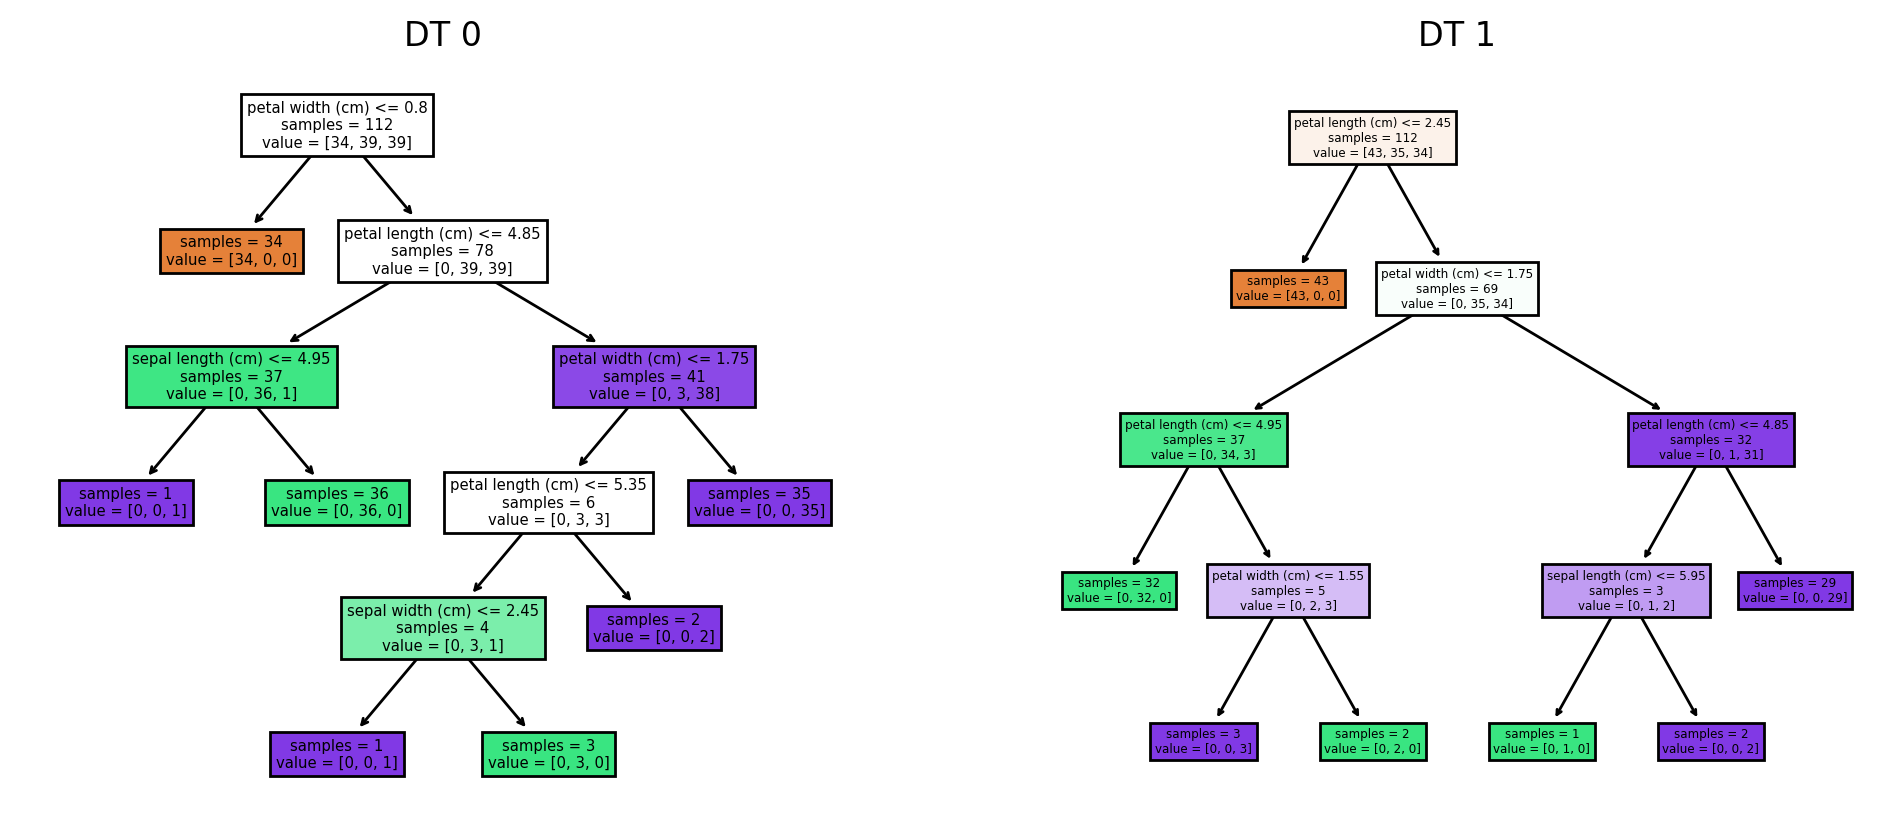

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.utils import resample
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# Load the IRIS dataset
iris = load_iris()
n_total_samples = len(iris.target)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, k in zip(axs, (0,1)):
    # Create a DT classifier and fit it to the dataset
    X, y = resample(iris.data, iris.target, n_samples=int(0.75*n_total_samples), replace=False)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X, y)

    # Plot it nicely
    tree.plot_tree(clf, filled=True, ax=ax, feature_names=iris.feature_names, impurity=False)
    ax.set_title(f"DT {k}")

plt.show()


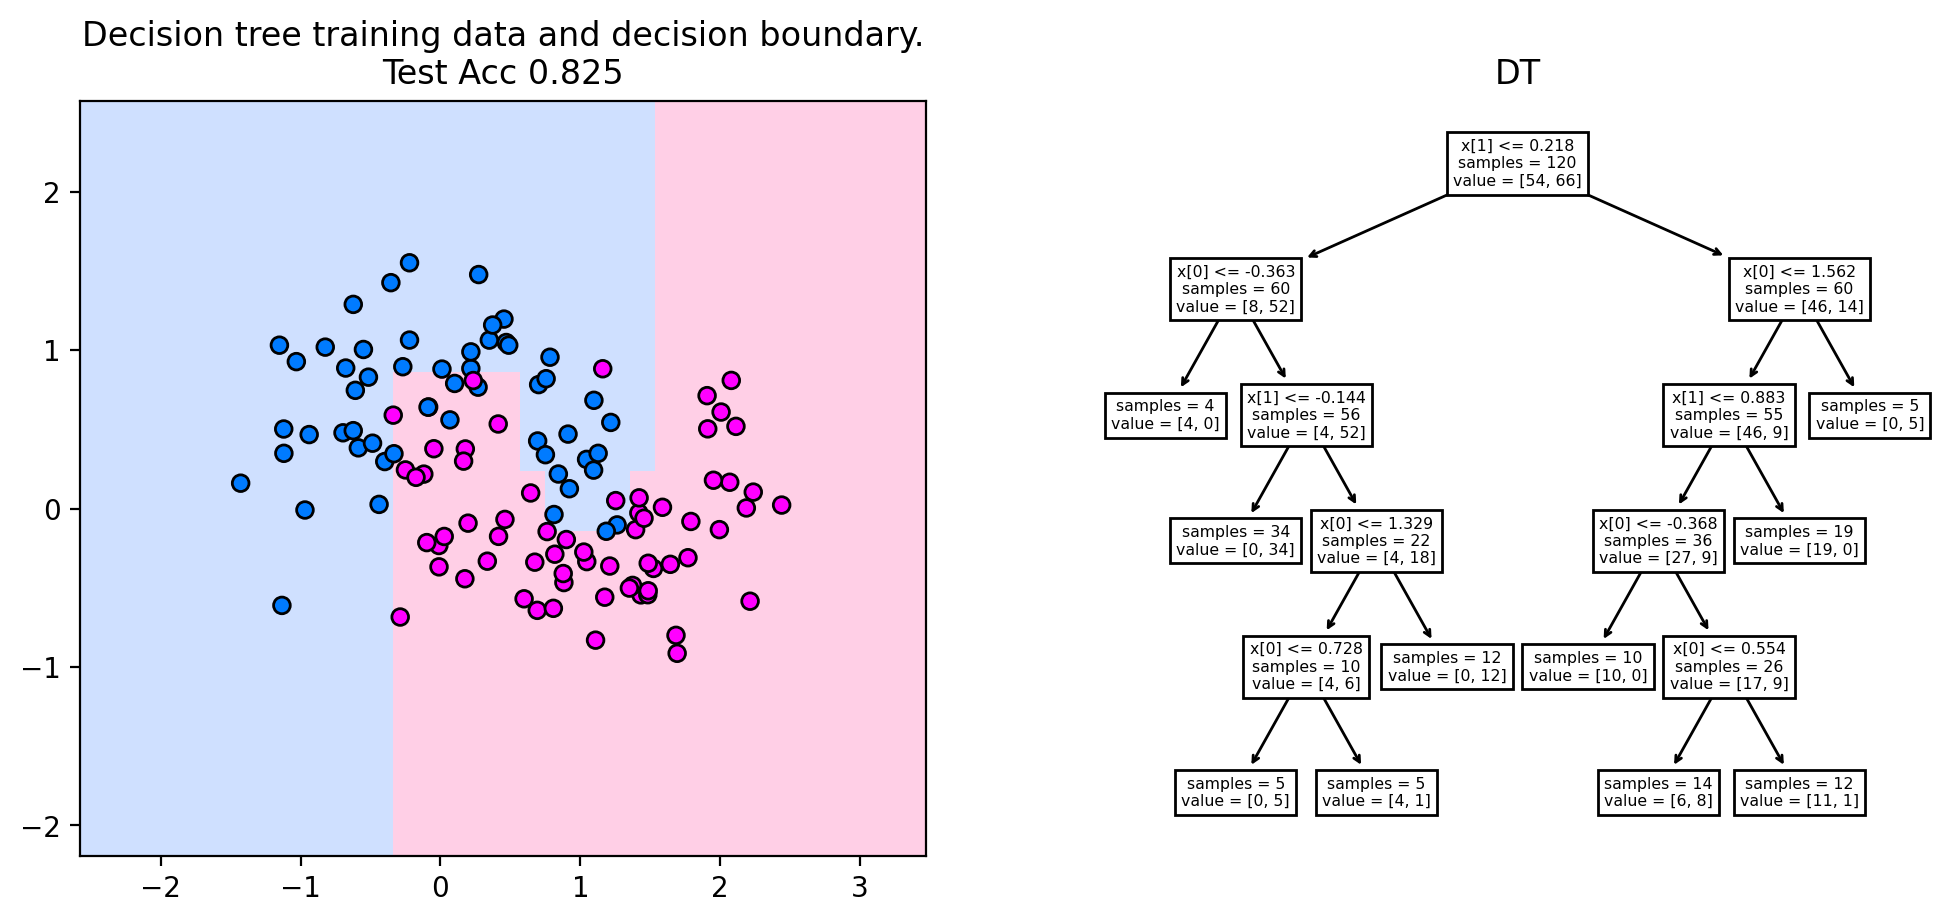

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
mpl.rcParams['figure.dpi'] = 200


X,y = make_moons(noise=0.3, random_state=0, n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
cm = ListedColormap(["#a0c3ff", "#ffa1cf"])
cm_points = ListedColormap(["#007bff", "magenta"])
clf = tree.DecisionTreeClassifier(max_depth=5)
y_pred = clf.fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.5,
    ax=axs[0],
    cmap=cm,
)
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k",cmap = cm_points)
axs[0].set_title(
    f"Decision tree training data and decision boundary.\nTest Acc {np.mean(clf.predict(X_test) == y_test)}"
)
ax.axis('scaled')

# Plot tree
tree.plot_tree(clf, filled=False, ax=axs[1], impurity=False)
axs[1].set_title(f"DT")
    
plt.show()
